# Worksheet 10

Name:  Rishab Sudhir

UID: U64819615

### Topics

- Singular Value Decomposition

#### Feature Extraction

SVD finds features that are orthogonal. The Singular Values correspond to the importance of the feature or how much variance in the data it captures.

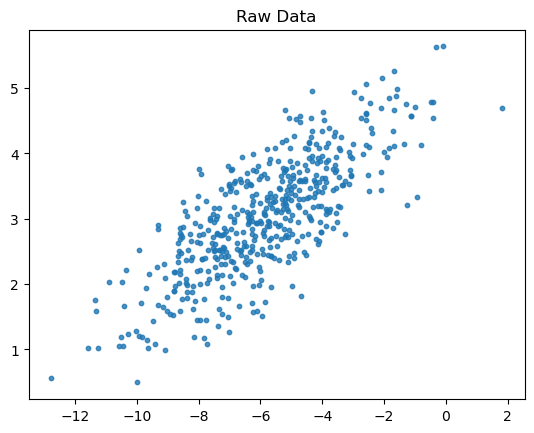

In [2]:
import numpy as np
import matplotlib.pyplot as plt


n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

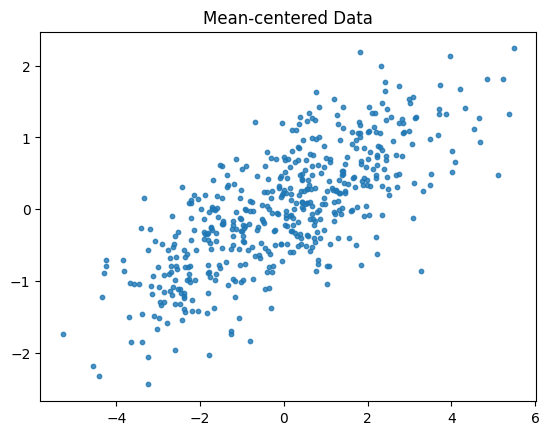

In [3]:
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.show()

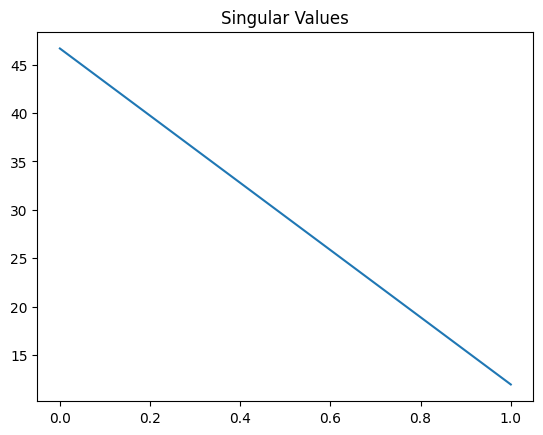

In [8]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
plt.plot(s) # only 2 singular values
plt.title("Singular Values")
plt.show()

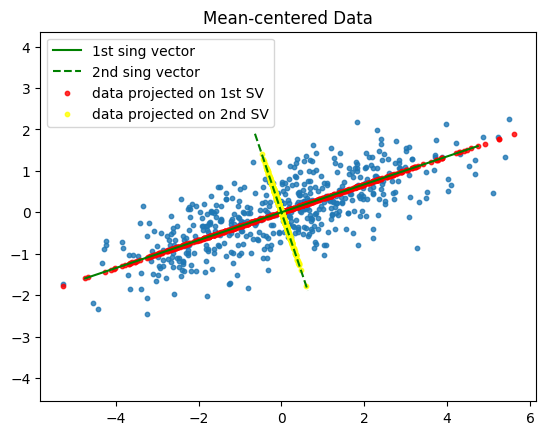

In [12]:
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Mean-centered Data")
plt.show()


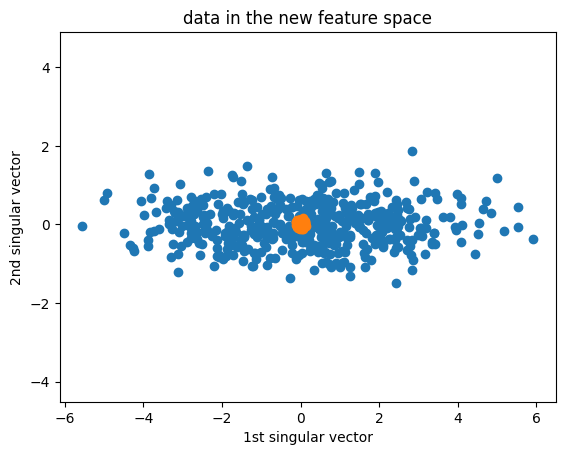

In [20]:
# show ouput from svd is the same
orthonormal_X = u
shifted_X = u.dot(np.diag(s))
plt.axis('equal')
plt.scatter(shifted_X[:,0], shifted_X[:,1])
plt.scatter(orthonormal_X[:,0], orthonormal_X[:,1])
plt.xlabel("1st singular vector")
plt.ylabel("2nd singular vector")
plt.title("data in the new feature space")
plt.show()

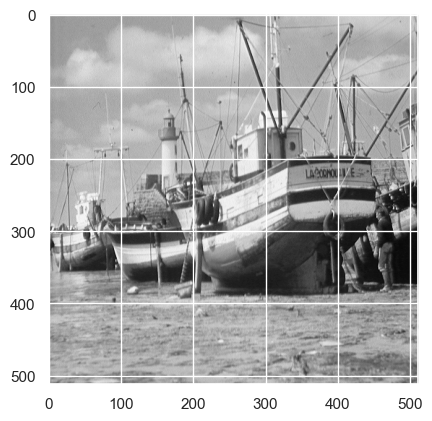

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

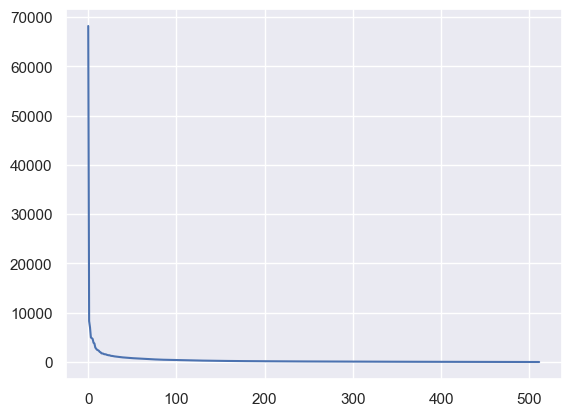

In [36]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.plot(s)

Notice you can get the image back by multiplying the matrices back together:

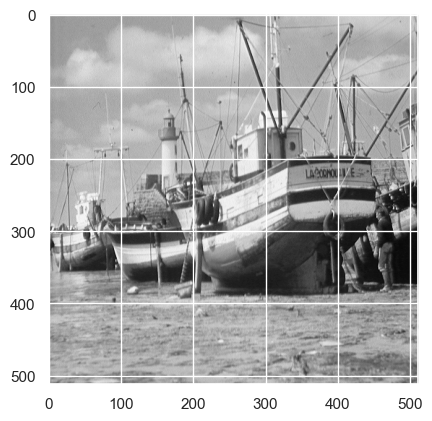

In [4]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [31]:
scopy = s.copy()
scopy[1:] = 0.0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

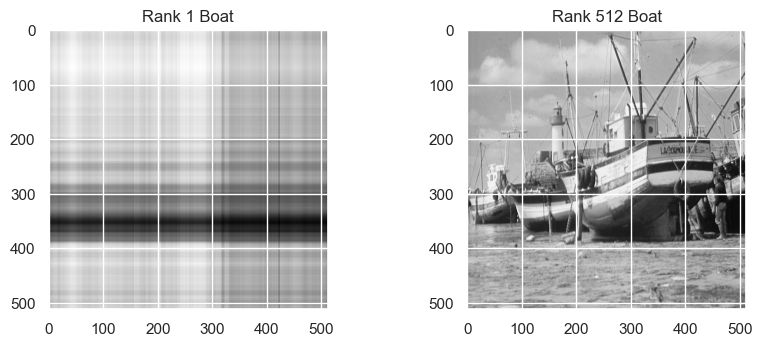

In [32]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

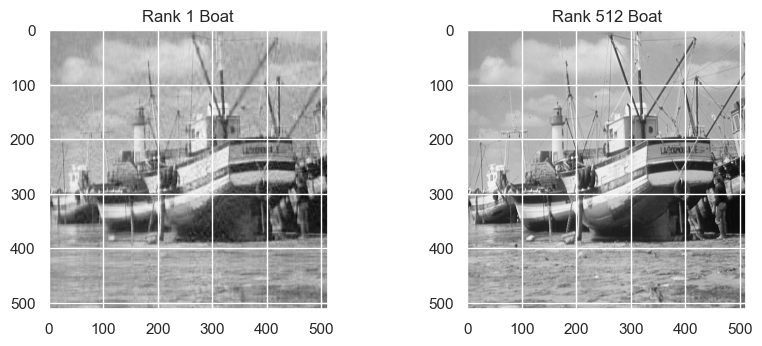

In [33]:
scopy = s.copy()
scopy[40:] = 0.0

boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

### Why you should care

a) By using an approximation of the data, you can improve the performance of classification tasks since:

1. there is less noise interfering with classification
2. no relationship between features after SVD
3. the algorithm is sped up when reducing the dimension of the dataset

Below is some code to perform facial recognition on a dataset. Notice that, applied blindly, it does not perform well:

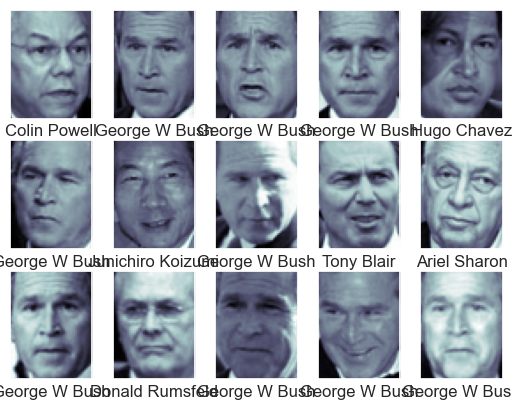

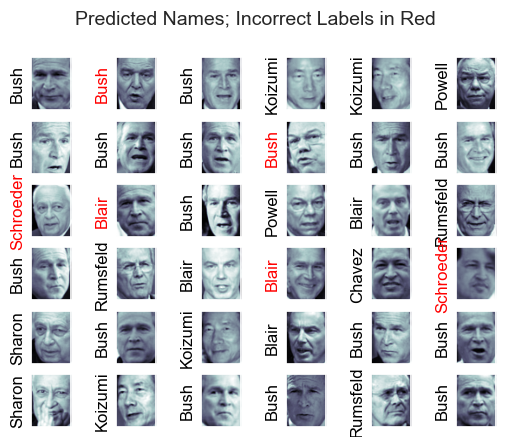

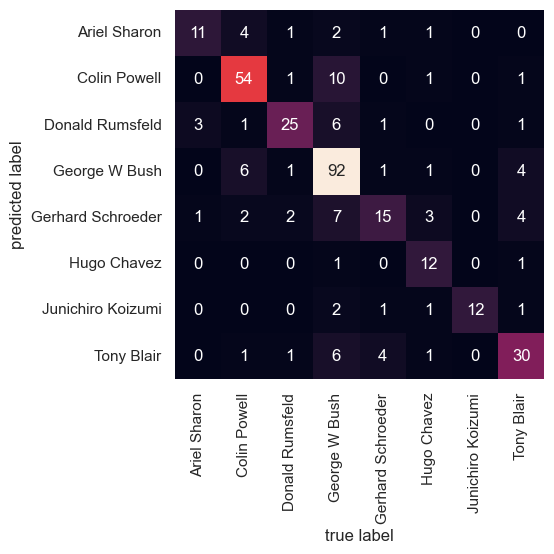

Accuracy =  0.744807121661721


In [1]:
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# blindly fit svm
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)

# fit model
model = svc.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

By performing SVD before applying the classification tool, we can reduce the dimension of the dataset.

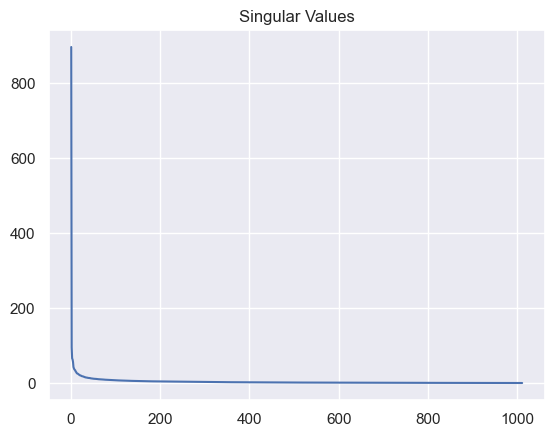

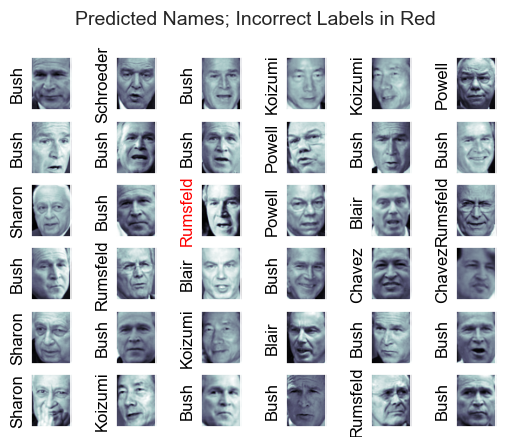

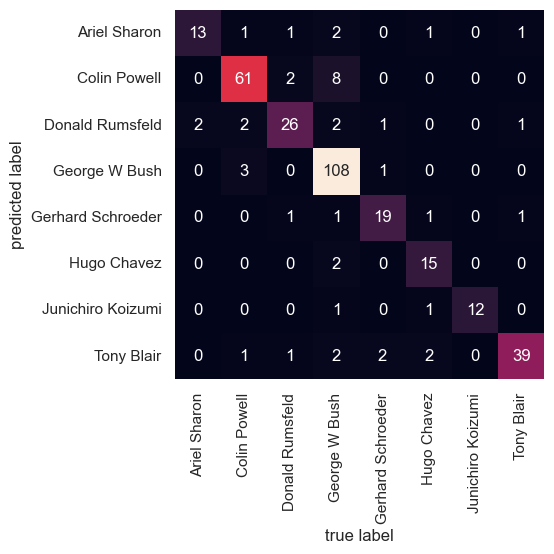

Accuracy =  0.8694362017804155


In [39]:
# look at singular values
_, s, _ = np.linalg.svd(Xtrain, full_matrices=False)
plt.plot(range(1,len(s)+1),s)
plt.title("Singular Values")
plt.show()

# extract principal components
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)
svcpca = make_pipeline(pca, svc)
model = svcpca.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

Similar to finding k in K-means, we're trying to find the point of diminishing returns when picking the number of singular vectors (also called principal components).

b) SVD can be used for anomaly detection.

The data below consists of the number of 'Likes' during a six month period, for each of 9000 users across the 210 content categories that Facebook assigns to pages.

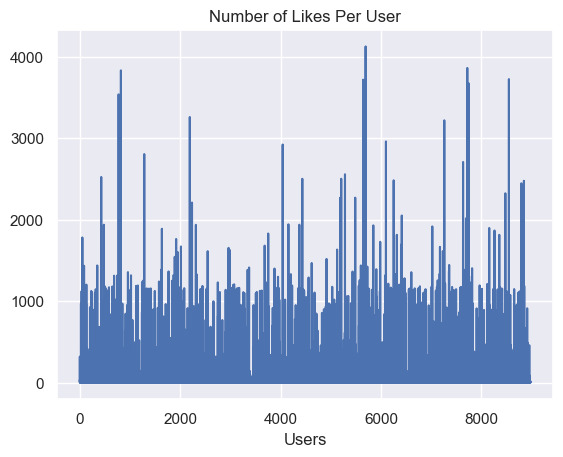

In [42]:
data = np.loadtxt('spatial_data.txt')

FBSpatial = data[:,1:]
FBSnorm = np.linalg.norm(FBSpatial,axis=1,ord=1)
plt.plot(FBSnorm)
plt.title('Number of Likes Per User')
_ = plt.xlabel('Users')
plt.show()

How users distribute likes across categories follows a general pattern that most users follow. This behavior can be captured using few singular vectors. And anomalous users can be easily identified.

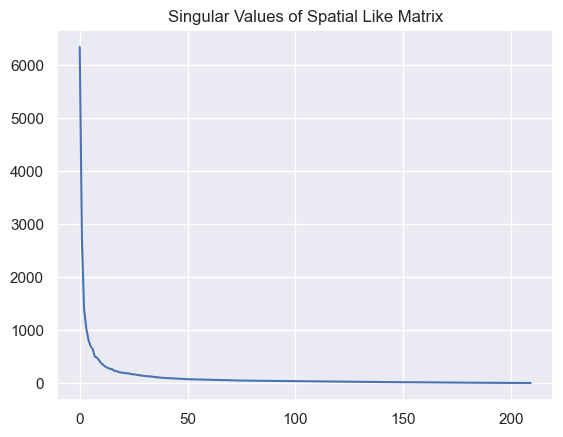

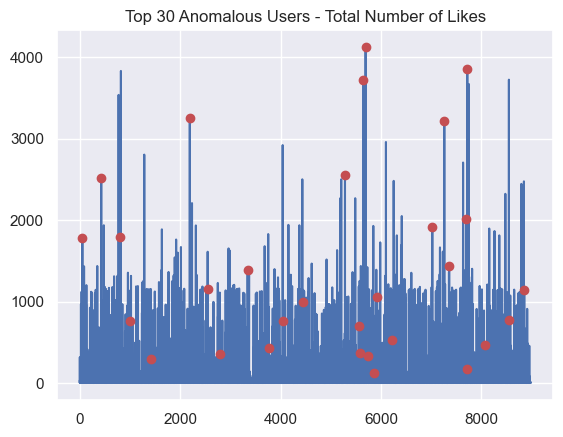

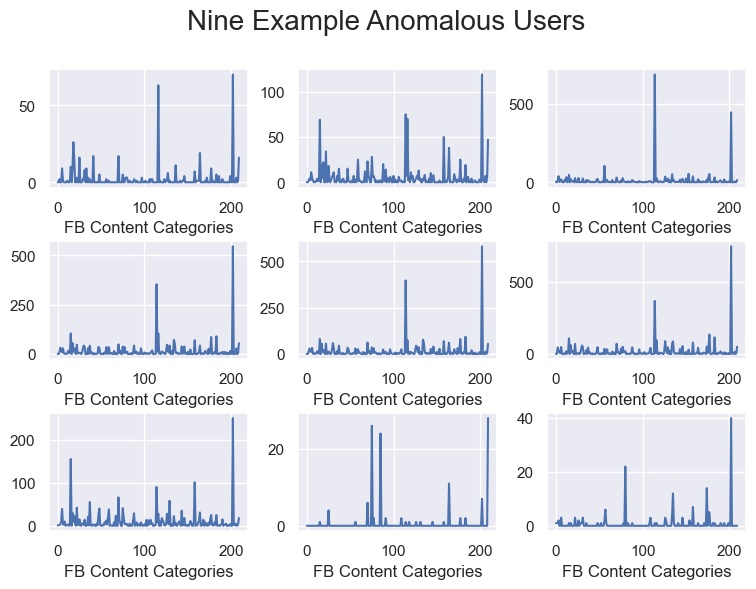

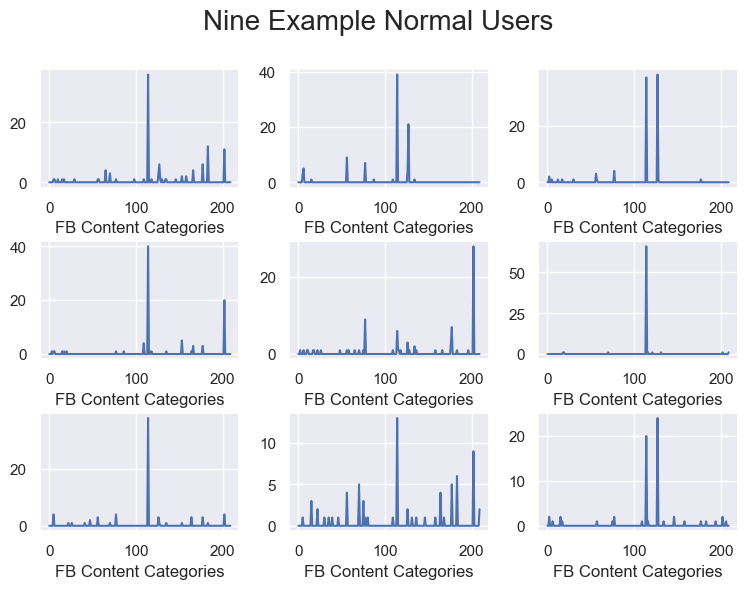

In [45]:

u,s,vt = np.linalg.svd(FBSpatial,full_matrices=False)
plt.plot(s)
_ = plt.title('Singular Values of Spatial Like Matrix')
plt.show()

RANK = 50
scopy = s.copy()
scopy[RANK:] = 0.
N = u @ np.diag(scopy) @ vt
O = FBSpatial - N
Onorm = np.linalg.norm(O, axis=1)
anomSet = np.argsort(Onorm)[-30:]
# plt.plot(Onorm)
# plt.plot(anomSet, Onorm[anomSet],'ro')
# _ = plt.title('Norm of Residual (rows of O)')
# plt.show()

plt.plot(FBSnorm)
plt.plot(anomSet, FBSnorm[anomSet],'ro')
_ = plt.title('Top 30 Anomalous Users - Total Number of Likes')
plt.show()

# anomalous users
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[anomSet[i-1],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
_ = plt.suptitle('Nine Example Anomalous Users',size=20)
plt.show()

# normal users
set = np.argsort(Onorm)[0:7000]
# that have high overall volume
max = np.argsort(FBSnorm[set])[::-1]
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[set[max[i-1]],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
_ = plt.suptitle('Nine Example Normal Users',size=20)
plt.show()

## Challenge Problem

a) Fetch the "mnist_784" data. Pick an image of a digit at random and plot it.

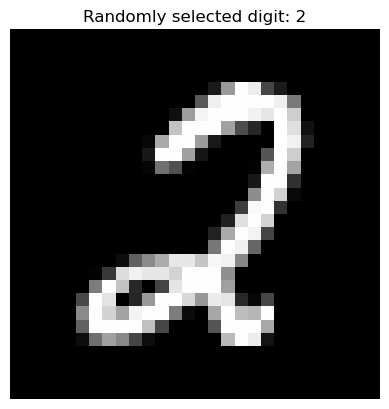

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# Generate a random index
random_index = np.random.randint(0, len(X))

# Extract the corresponding image data and label
random_digit = X[random_index]
random_digit_image = random_digit.reshape(28, 28)
random_label = y[random_index]

# Plot the image
plt.imshow(random_digit_image, cmap='gray')
plt.title(f'Randomly selected digit: {random_label}')
plt.axis('off')  # Hide the axis for better visualization
plt.show()


b) Plot its singular value plot.

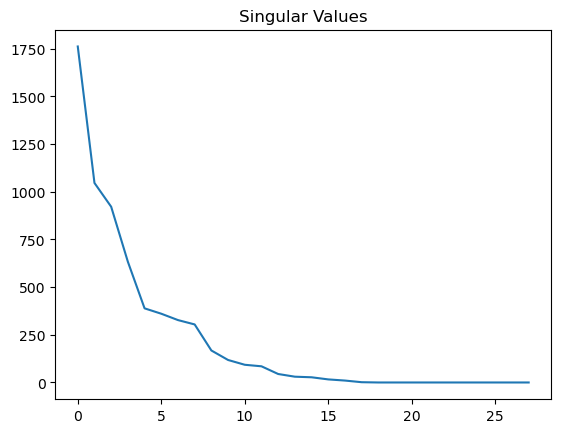

In [25]:
u,s,vt=np.linalg.svd(random_digit_image, full_matrices=False)
plt.plot(s) 
plt.title("Singular Values")
plt.show()

c) By setting some singular values to 0, plot the approximation of the image next to the original image

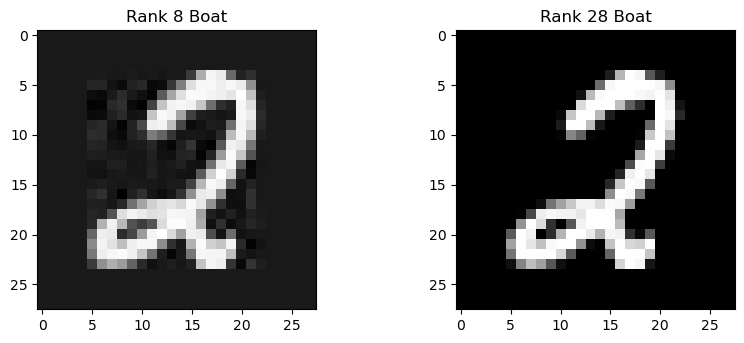

In [34]:
scopy = s.copy()
scopy[8:] = 0.0

number_reconstruction = u.dot(np.diag(scopy)).dot(vt)


plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(number_reconstruction, cmap = cm.Greys_r)
plt.title('Rank 8 Boat')
plt.subplot(1,2,2)
plt.imshow(random_digit_image, cmap = cm.Greys_r)
plt.title('Rank 28 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()


d) Consider the entire dataset as a matrix. Perform SVD and explain why / how you chose a particular rank. Note: you may not be able to run this on the entire dataset in a reasonable amount of time so you may take a small random sample for this and the following questions.

/Users/rsudhir/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


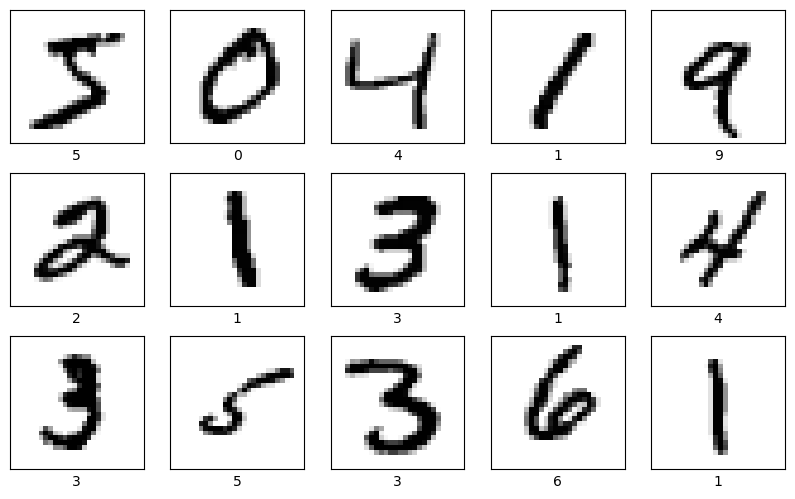

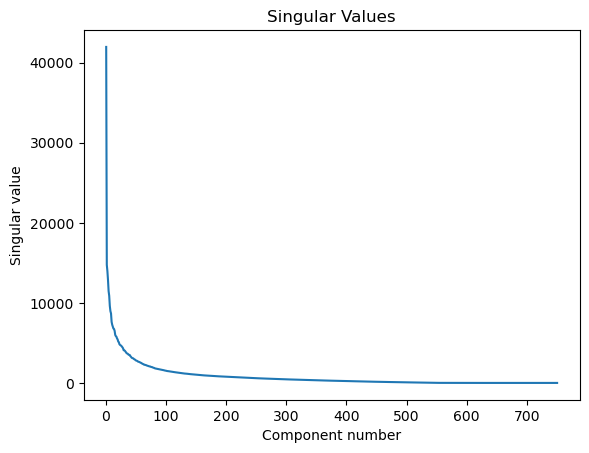

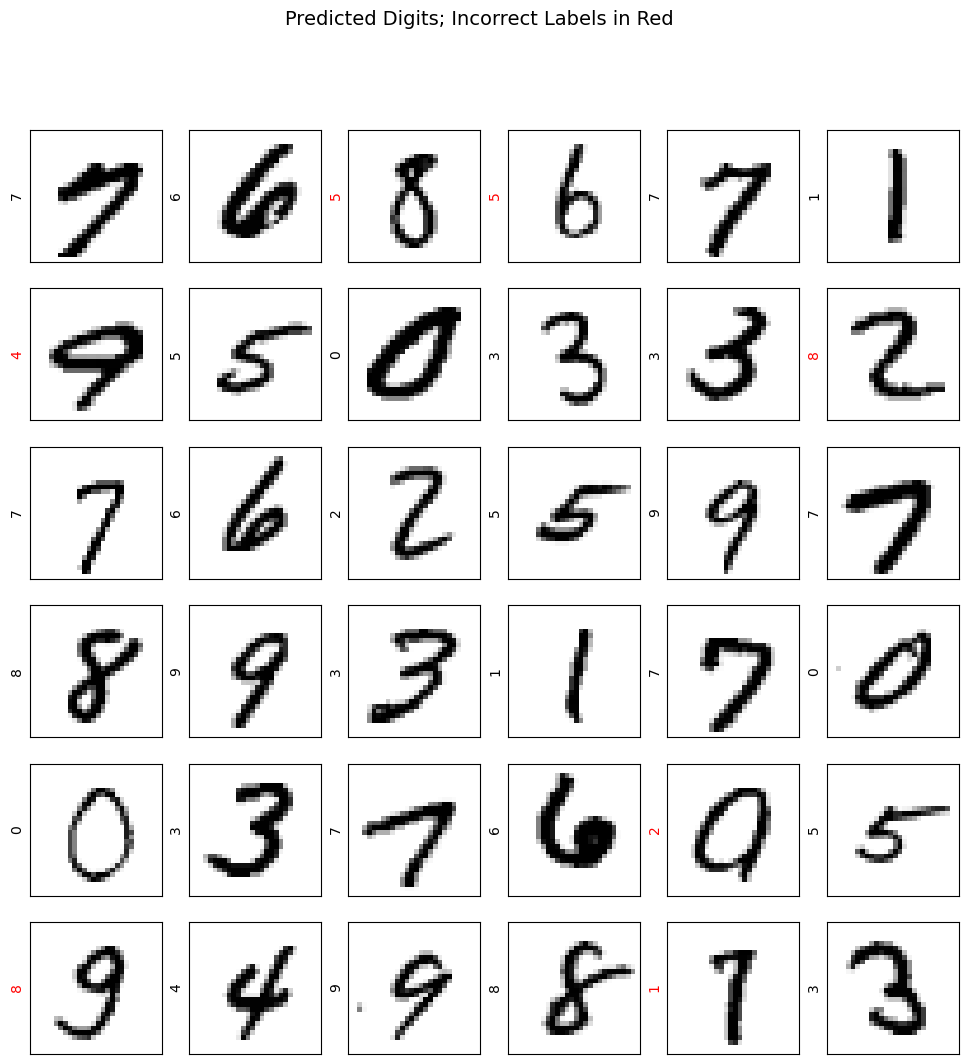

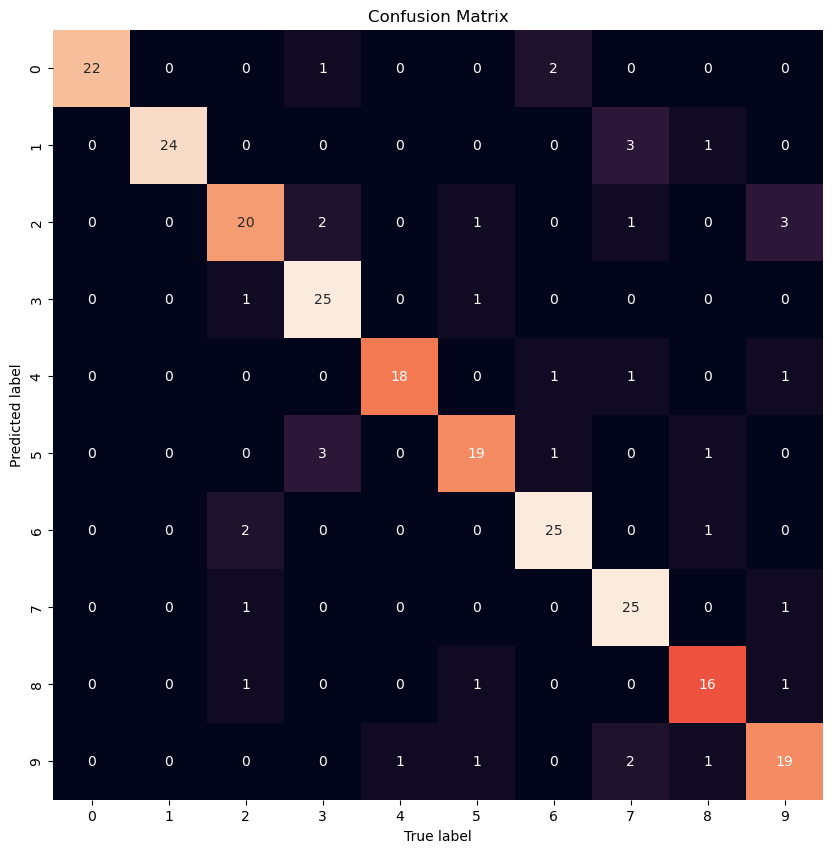

Accuracy =  0.852


In [43]:
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Fetching the data
data, labels  = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# Take a subset of the data for quicker processing
# we use the first 1000 instances
data_subset = X[:1000]
labels_subset = y[:1000]

# Plot the first few images of the subset
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(data_subset[i].reshape(28, 28), cmap='gray_r')
    axi.set(xticks=[], yticks=[], xlabel=labels_subset[i])
plt.show()

# Split the subset of data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(data_subset, labels_subset, test_size=0.25, random_state=42)

# Perform SVD on the training data
U, S, Vt = np.linalg.svd(Xtrain, full_matrices=False)

# Plot the singular values to inspect them
plt.plot(range(1, len(S)+1), S)
plt.title("Singular Values")
plt.xlabel('Component number')
plt.ylabel('Singular value')
plt.show()

# Extract principal components

# Set the number of components to a value determined from the SVD plot
pca = PCA(n_components=100, whiten=True)

svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)

# Create a pipeline that includes PCA and SVC
svcpca = make_pipeline(pca, svc)

# Fit the model to the training data
model = svcpca.fit(Xtrain, ytrain)

# Use the model to predict the test set
yfit = model.predict(Xtest)

# We'll display a 6x6 grid of images with their predicted labels
fig, ax = plt.subplots(6, 6, figsize=(12, 12))
for i, axi in enumerate(ax.flat):
    # Reshape the data to 28x28 image for display
    axi.imshow(Xtest[i].reshape(28, 28), cmap='gray_r')

    # Set the x and y ticks to empty, we don't need them for images
    axi.set(xticks=[], yticks=[])

    # Set the label below the image to the predicted label
    # If the prediction is correct, the label is black; if incorrect, it's red
    true_label = ytest[i]
    predicted_label = yfit[i]
    axi.set_ylabel(predicted_label, color='black' if predicted_label == true_label else 'red')

# Add a main title to the figure
fig.suptitle('Predicted Digits; Incorrect Labels in Red', size=14)
plt.show()

# Calculate the confusion matrix
mat = confusion_matrix(ytest, yfit)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(ytest),
            yticklabels=np.unique(ytest))
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(ytest, yfit)
print("Accuracy = ", accuracy)

Chose a rank of about 100 because that is where the elbow of the graph is and where the varience between columns starts to taper off.

e) Using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. Note: the centroids should be represented as images.

/Users/rsudhir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


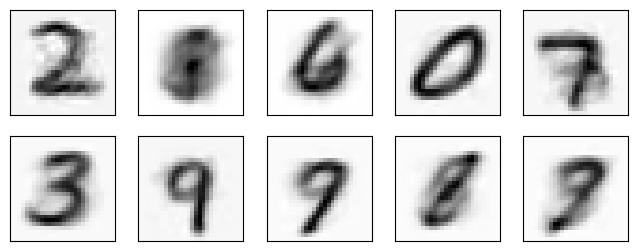

In [44]:
from sklearn.cluster import KMeans

# X_pca = pca.fit_transform(mnist.data) is creating a new dataset X_pca 
# where each image from mnist.data has been transformed from its original 
# 784-dimensional space (28x28 pixels) into a reduced 100-dimensional space.
X_pca = pca.fit_transform(data_subset)

# Now apply KMeans clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=10, init='k-means++')
kmeans.fit_predict(X_pca)

# Extract the centroids
centroids = kmeans.cluster_centers_

# Inverse transform the centroids back to the original image space
centroids = pca.inverse_transform(centroids)

# Plot the centroids as images
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = centroids.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

f) Repeat e) on the original dataset (if you used a subset of the dataset, keep using that same subset). Comment on any differences (or lack thereof) you observe between the centroids created here vs the ones you created in e).

/Users/rsudhir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


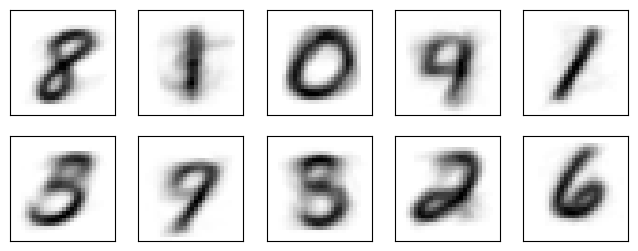

In [46]:
from sklearn.cluster import KMeans

# Now apply KMeans clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=10, init='k-means++')
kmeans.fit_predict(data_subset)

# Extract the centroids
centroids = kmeans.cluster_centers_›

# Plot the centroids as images
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = centroids.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Don't see to much difference to be honest, if anything the one with the original data(or data subset) has slightly clearer numbers and a bit more variation in the numbers.

g) Create a matrix (let's call it `O`) that is the difference between the original dataset and the rank-10 approximation of the dataset. i.e. if the original dataset is `A` and the rank-10 approximation is `B`, then `O = A - B`

In [47]:
# Define a new PCA with only 10 components
pca_10 = PCA(n_components=10)

# Fit and transform the data to get the 10-dimensional PCA representation
X_pca_10 = pca_10.fit_transform(data_subset)

# Inverse transform these 10 components back into the original feature space
X_approx_10 = pca_10.inverse_transform(X_pca_10)

# Calculate the difference matrix O
mat_O = data_subset - X_approx_10

h) The largest (using euclidean distance from the origin) rows of the matrix `O` could be considered anomalous data points. Briefly explain why. Plot the 10 images (by finding them in the original dataset) responsible for the 10 largest rows of that matrix `O`.

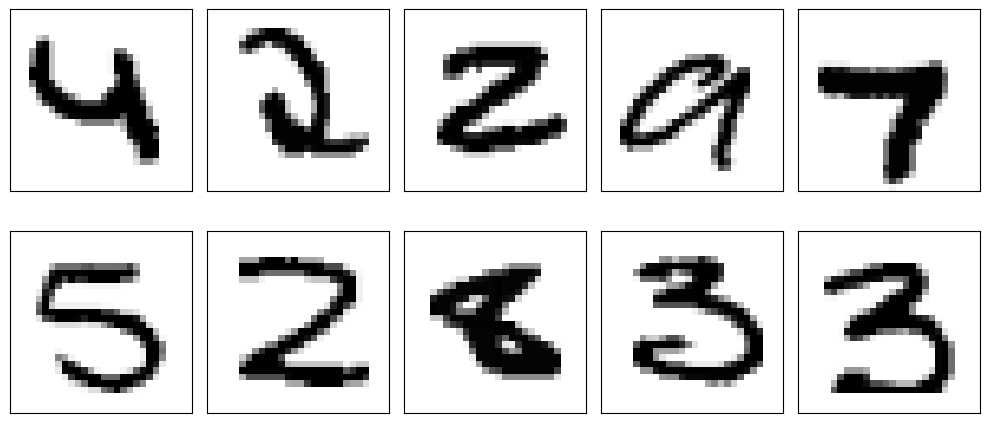

In [48]:
# Calculate the Euclidean norm of each row in the matrix 'O'
Onorm = np.linalg.norm(mat_O, axis=1)

# Find the indices of the 10 rows with the largest norm
anom_indices = np.argsort(Onorm)[-10:]

# Plot the 10 images corresponding to these indices
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    # Use the index to find the original image
    image = data_subset[anom_indices[i]].reshape(28, 28)
    ax.imshow(image, cmap='gray_r')
    ax.set(xticks=[], yticks=[])
plt.tight_layout()
plt.show()

The norm of a row in mat_O indicates the magnitude of the residuals (errors) for that image. A larger norm means the original image is less accurately represented by the PCA approximation. This could be due to uniqueness or noise in the data.

Rows with the largest norms are considered anomalous because they are the furthest from the PCA approximation. These could be images that are not typical of the data set—such as digits that are written very differently from the norm, digits that may be partially obscured or contain noise, or even incorrect labels.

